# Харлунин А.А. (M32021 | ФВЧФ 1.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
%matplotlib notebook

In [2]:
def Tridiagonal_shrinked(A, b):
    """
    A = 
    [[ a0    b0   c0]
     [ a1    b1   c1]
     [ a2    b2   c2]
            ...
     [aN-1  bN-1 cN-1]]
    
    """
    
    if (len(A) != len(b)):
        raise ValueError(f"Length is not the same: {len(A)} vs {len(b)}")
        
    N = len(A)
    
    v = np.zeros(N)
    
    if len(A) == 0:
        return v
    
    v[0] = A[0][2]/-A[0][1]
    
    u = np.zeros(N)
    u[0] = -b[0]/-A[0][1]
    
    for i in range(1, N-1):
        v[i] = A[i][2]/(-A[i][1]-A[i][0]*v[i-1])
        
        u[i] = (A[i][0]*u[i-1]-b[i])/(-A[i][1]-A[i][0]*v[i-1])
    
    v[N-1] = 0
    
    u[N-1] = (A[N-1][0]*u[N-2]-b[N-1])/(-A[N-1][1]-A[N-1][0]*v[N-2])
    
    x = np.zeros(N)
    
    x[N-1] = u[N-1]
    for i in range(N-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
        
    return x

# уравнение теплопроводности

$\frac{\partial u}{\partial t} = \frac{\partial^2u}{\partial x^2} + f(x,t)$

In [3]:
f = lambda x,t: 0.01*np.exp(-(x-0.5)**2/(0.1*2))*np.exp(-t)

# Задача Неймана

In [4]:
ux_0t = lambda t: 0.4*t*np.exp(-(t*t)/(0.25))*0 + 1
ux_1t = lambda t: 0.5*np.sqrt(t)*np.exp(-t*t/1.0)*0
u_x0 = lambda x: 10*x**2*(1-x)**2

In [5]:
N = 1000

In [6]:
x = np.linspace(0, 1, N)
h = x[1] - x[0]
t = np.linspace(0, 0.1, N)
tau = t[1] - t[0]

In [7]:
def create_tridiagonal_neymann(tau: float, h: float, 
                                 new_m: float, u_current, f):
    
    N = len(u_current) - 2
    arr = np.zeros((N,3), dtype="float32")
    d = np.zeros((N), dtype="float32")
    
    for i in range(N):
        #ai
        if i==0:
            ai=0
        elif i==N-1:
            ai = -2/3*tau/h**2
        else:
            ai=-tau/h**2
        
        #bi
        if i==0 or i==N-1:
            bi = 1+2/3*tau/h**2
        else:
            bi = 1+2*tau/h**2
        
        #ci
        if i==0:
            ci=-2/3*tau/h**2
        elif i==N-1:
            ci = 0
        else:
            ci=-tau/h**2
        
        arr[i][0] = ai
        arr[i][1] = bi
        arr[i][2] = ci
        
        d[i] = u_current[i+1] + tau*f(x[i+1], new_m)
        
        
        if (i==0):
            d[i] -= 2/3*tau/h * ux_0t(new_m)
        elif (i==N-1):
            d[i] += 2/3*tau/h * ux_1t(new_m)
        
        
    return arr, d

In [8]:
def generate_nest_row(U, t):
    vmid = list(Tridiagonal_shrinked(*create_tridiagonal_neymann(tau,h,t,U[-1],f)))
    
    
    vleft_i = 4/3*vmid[0] - 1/3*vmid[1] - 2/3*h*ux_0t(t)
    vright_i = -1/3*vmid[-2] + 4/3*vmid[-1] + 2/3*h*ux_1t(t)
    
    new_row = [vleft_i] + vmid + [vright_i] 
    return new_row

In [9]:
U = []
U.append(u_x0(x))

for _t in t[1:]:
    U.append(generate_nest_row(U, _t))

<IPython.core.display.Javascript object>


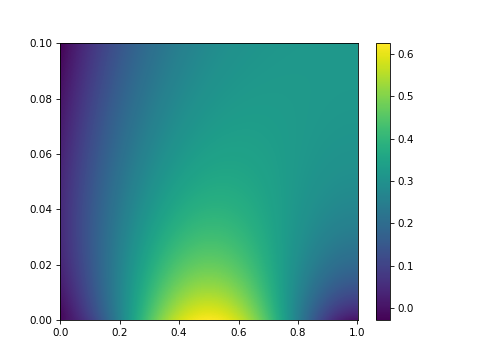

In [10]:
plt.figure()
X, T = np.meshgrid(x, t)
q = plt.pcolormesh(X, T, U, shading='auto')
plt.colorbar(q)
plt.show()
plt.ioff()

In [11]:
U = np.array(U)
fig2, ax2 = plt.subplots()
l, = ax2.plot([],[])
def anim(frame): 
    l.set_data(x, U[frame])
    
    return l,

ax2.set_xlim([0,1])
ax2.set_ylim([-0.01, U.max()+0.01]) 
anima = FuncAnimation(fig2, func = anim, frames = len(U), blit = True, interval = 10)
plt.show()

<IPython.core.display.Javascript object>